### Exercise 1 : Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("dataset_heart.csv")
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
df.columns. tolist()

['age',
 'sex ',
 'chest pain type',
 'resting blood pressure',
 'serum cholestoral',
 'fasting blood sugar',
 'resting electrocardiographic results',
 'max heart rate',
 'exercise induced angina',
 'oldpeak',
 'ST segment',
 'major vessels',
 'thal',
 'heart disease']

In [4]:
print("Shape:",df.shape)
df.info()

Shape: (270, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  ma

In [5]:
df.nunique()

age                                      41
sex                                       2
chest pain type                           4
resting blood pressure                   47
serum cholestoral                       144
fasting blood sugar                       2
resting electrocardiographic results      3
max heart rate                           90
exercise induced angina                   2
oldpeak                                  39
ST segment                                3
major vessels                             4
thal                                      3
heart disease                             2
dtype: int64

In [6]:
df.columns = [c.strip() for c in df.columns]

### Exercise 2 : Logistic Regression without Grid Search

In [7]:
X = df.drop(columns =["heart disease"])
y =df["heart disease"]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42)

In [8]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [9]:
''' Standardize features'''
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

''' Fit logistic regression'''
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train_sc, y_train) 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
'''Prediction and accuracy'''
y_pred = model.predict(X_test_sc)        
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy:: {acc:.3f}")

Accuracy:: 0.907


### Exercise 3 : Logistic Regression with Grid Search

In [11]:
'''Split features/target'''
X = df.drop("heart disease", axis =1)
y =df["heart disease"]

''' Train/test split'''
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify =y, random_state =42)

In [12]:
'''Pipeline: scale -> logistic regression'''
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000))
])

In [13]:
''' Fast grid'''
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l1", "l2"],
    "clf__solver": ["liblinear"]
}

In [14]:
'''Grid search (use cv=3 to run faster)'''
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=0)

In [15]:
'''Fit and evaluate'''
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best params:", grid.best_params_)
print("Best CV Accuracy:", round(grid.best_score_, 4))

print("\nTest metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))

print("\nConfusion matrix [[TN, FP], [FN, TP]]:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

Best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best CV Accuracy: 0.838

Test metrics:
Accuracy: 0.8333
Precision: 0.8889
Recall: 0.8
F1: 0.8421
ROC AUC: 0.9083

Confusion matrix [[TN, FP], [FN, TP]]:
[[24  6]
 [ 3 21]]

Classification report:
              precision    recall  f1-score   support

           1     0.8889    0.8000    0.8421        30
           2     0.7778    0.8750    0.8235        24

    accuracy                         0.8333        54
   macro avg     0.8333    0.8375    0.8328        54
weighted avg     0.8395    0.8333    0.8338        54



### Exercise 4 : SVM without Grid Search

In [16]:
'''Split features/target'''
X = df.drop("heart disease", axis =1)
y =df["heart disease"]

''' Train/test split'''
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify =y, random_state =42)

In [17]:
'''Pipeline: scale -> SVM (manual hyperparams)'''
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=2.0, gamma="scale",
                class_weight="balanced", probability=True))
])

In [18]:
'''Fit + evaluate'''
svm_pipe.fit(X_train, y_train)
y_pred  = svm_pipe.predict(X_test)
y_proba = svm_pipe.predict_proba(X_test)[:, 1]

In [19]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("Confusion matrix [[TN, FP], [FN, TP]]:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8519
Precision: 0.8929
Recall: 0.8333
F1: 0.8621
ROC AUC: 0.8875
Confusion matrix [[TN, FP], [FN, TP]]:
 [[25  5]
 [ 3 21]]

Classification report:
               precision    recall  f1-score   support

           1     0.8929    0.8333    0.8621        30
           2     0.8077    0.8750    0.8400        24

    accuracy                         0.8519        54
   macro avg     0.8503    0.8542    0.8510        54
weighted avg     0.8550    0.8519    0.8523        54



### Exercise 5 : SVM with Grid Search

In [20]:

''' Split features/target'''

X = df.drop(columns=["heart disease"])
y = df["heart disease"]

''' Train/test split'''
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

''' Pipeline: scale -> SVC'''
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

'''Parameter grid (no huge search to keep things fast/reproducible)'''
param_grid = [
    {
        "svm__kernel": ["linear"],
        "svm__C": [0.1, 1, 10]
    },
    {
        "svm__kernel": ["rbf"],
        "svm__C": [0.1, 1, 10],
        "svm__gamma": ["scale", "auto"]
    },
    {
        "svm__kernel": ["poly"],
        "svm__C": [0.1, 1, 10],
        "svm__degree": [2, 3],
        "svm__gamma": ["scale", "auto"],
        "svm__coef0": [0.0, 0.5]
    }
]

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=0,
    refit=True
)

''' Fit grid search'''
grid.fit(X_train, y_train)

''' Evaluate on test set'''
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best params:", grid.best_params_)
print("Best CV Accuracy:", round(grid.best_score_, 4))

print("\nTest set metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision (pos_label=1):", round(precision_score(y_test, y_pred, pos_label=1), 4))
print("Recall (pos_label=1):", round(recall_score(y_test, y_pred, pos_label=1), 4))
print("F1 (pos_label=1):", round(f1_score(y_test, y_pred, pos_label=1), 4))

print("\nConfusion matrix [[TN, FP], [FN, TP]]:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))


Best params: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Best CV Accuracy: 0.8426

Test set metrics:
Accuracy: 0.8519
Precision (pos_label=1): 0.8929
Recall (pos_label=1): 0.8333
F1 (pos_label=1): 0.8621

Confusion matrix [[TN, FP], [FN, TP]]:
[[25  5]
 [ 3 21]]

Classification report:
              precision    recall  f1-score   support

           1     0.8929    0.8333    0.8621        30
           2     0.8077    0.8750    0.8400        24

    accuracy                         0.8519        54
   macro avg     0.8503    0.8542    0.8510        54
weighted avg     0.8550    0.8519    0.8523        54



### Exercise 6 : XGBoost without Grid Search

=== Manual XGBoost (no tuning) ===
Params: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 5, 'reg_lambda': 1.0, 'gamma': 0.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'n_jobs': -1, 'random_state': 42, 'tree_method': 'hist'}
Accuracy : 0.8148
Precision: 0.7692
Recall   : 0.8333
F1       : 0.8000
ROC AUC  : 0.8917

Confusion matrix (rows=true, cols=pred) [labels 0,1]:
        Pred 0  Pred 1
True 0      24       6
True 1       4      20

Classification report:
              precision    recall  f1-score   support

           0     0.8571    0.8000    0.8276        30
           1     0.7692    0.8333    0.8000        24

    accuracy                         0.8148        54
   macro avg     0.8132    0.8167    0.8138        54
weighted avg     0.8181    0.8148    0.8153        54



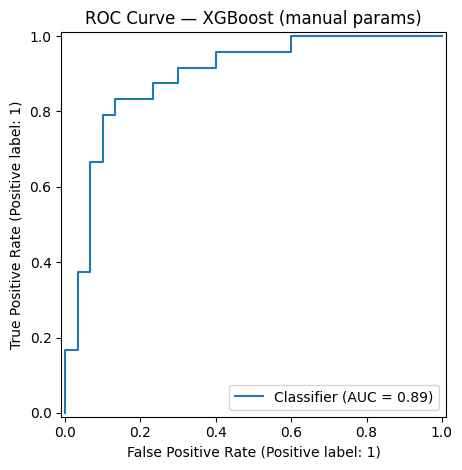


Top 10 feature importances:
                         importance
thal                       0.182436
chest pain type            0.175038
major vessels              0.147194
exercise induced angina    0.091500
ST segment                 0.087469
oldpeak                    0.068108
sex                        0.065317
age                        0.045849
serum cholestoral          0.043424
resting blood pressure     0.038306


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

# ========= 1) Data & target =========
# X = features, y = binary target {0,1}
X = df.drop(columns=["heart disease"])

# Robust label handling (works for {1,2}, {0,1}, or strings like {"No","Yes"})
le = LabelEncoder()
y = le.fit_transform(df["heart disease"])

# Sanity check: binary only
classes = set(y)
assert classes <= {0, 1} and len(classes) == 2, f"Target must be binary; got {classes}"

# ========= 2) Train/Test Split (stratified) =========
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ========= 3) XGBoost (manual hyperparams; no tuning) =========
params = dict(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_lambda=1.0,
    gamma=0.0,
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42,
    tree_method="hist",
)

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

# ========= 4) Evaluation =========
y_proba = model.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)  # explicit threshold

acc     = accuracy_score(y_test, y_pred)
prec    = precision_score(y_test, y_pred, zero_division=0)
rec     = recall_score(y_test, y_pred, zero_division=0)
f1      = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)
cm      = confusion_matrix(y_test, y_pred, labels=[0, 1])
report  = classification_report(y_test, y_pred, digits=4, zero_division=0)

print("=== Manual XGBoost (no tuning) ===")
print("Params:", params)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1       : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

print("\nConfusion matrix (rows=true, cols=pred) [labels 0,1]:")
cm_df = pd.DataFrame(cm, index=["True 0","True 1"], columns=["Pred 0","Pred 1"])
print(cm_df)

print("\nClassification report:")
print(report)

# ========= 5) ROC Curve =========
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve — XGBoost (manual params)")
plt.tight_layout()
plt.show()

# ========= 6) Quick Feature Importance (gain-based) =========
importances = model.feature_importances_
fi = (
    pd.Series(importances, index=X.columns)
      .sort_values(ascending=False)
      .to_frame("importance")
)
print("\nTop 10 feature importances:")
print(fi.head(10))


### Exercise 7 : XGBoost with Grid Search

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best CV ROC AUC: 0.8828
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

=== Test Metrics ===
Accuracy : 0.8148
Precision: 0.7692
Recall   : 0.8333
F1       : 0.8
ROC AUC  : 0.8653

Classification report:
              precision    recall  f1-score   support

           0     0.8571    0.8000    0.8276        30
           1     0.7692    0.8333    0.8000        24

    accuracy                         0.8148        54
   macro avg     0.8132    0.8167    0.8138        54
weighted avg     0.8181    0.8148    0.8153        54



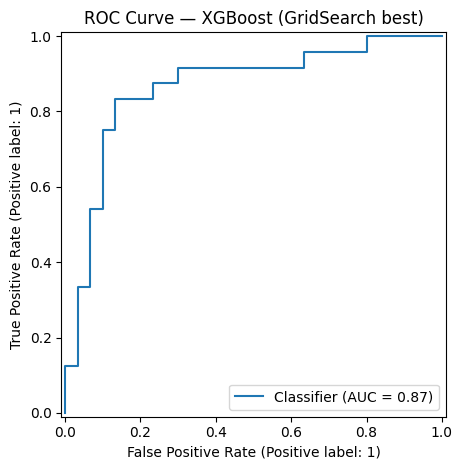


Top 10 feature importances:
thal                       0.231014
chest pain type            0.178294
major vessels              0.114641
exercise induced angina    0.098744
ST segment                 0.054046
sex                        0.051691
oldpeak                    0.047667
resting blood pressure     0.046684
max heart rate             0.040515
age                        0.039741
dtype: float32


In [26]:
# 0) Imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt
import xgboost as xgb

# 1) Separate features (X) and target (y)
#    - We assume your target column is named exactly "heart disease"
X = pd.get_dummies(df.drop(columns=["heart disease"]), drop_first=False)

# Turn target into 0/1 (works for 1/2 or Yes/No, etc.)
le = LabelEncoder()
y = le.fit_transform(df["heart disease"])

# 2) Train/test split (keep class balance with stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Build a basic XGBoost model (binary classification)
base_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

# 4) A SMALL grid of hyperparameters (keeps it quick)
param_grid = {
    "learning_rate": [0.05, 0.1],   # how big each boosting step is
    "n_estimators":  [200, 400],    # number of trees
    "max_depth":     [3, 4],        # tree depth (smaller = less overfitting)
}

# 5) Cross-validation setup (5 folds, stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6) Grid search: try each combo, pick the best by ROC AUC
grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring="roc_auc",   # good for binary classification
    cv=cv,
    n_jobs=-1,
    refit=True,          # retrain best model on all training data
    verbose=1
)

grid.fit(X_train, y_train)

print("Best CV ROC AUC:", round(grid.best_score_, 4))
print("Best Params:", grid.best_params_)

best_model = grid.best_estimator_

# 7) Evaluate on the test set (the data we didn’t train on)
y_proba = best_model.predict_proba(X_test)[:, 1]    # probabilities for class 1
y_pred  = (y_proba >= 0.5).astype(int)              # convert probs to 0/1

print("\n=== Test Metrics ===")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred, zero_division=0), 4))
print("Recall   :", round(recall_score(y_test, y_pred, zero_division=0), 4))
print("F1       :", round(f1_score(y_test, y_pred, zero_division=0), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_proba), 4))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# 8) Simple ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve — XGBoost (GridSearch best)")
plt.tight_layout()
plt.show()

# 9) Quick feature importance peek (which features mattered most)
fi = (
    pd.Series(best_model.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
      .head(10)
)
print("\nTop 10 feature importances:")
print(fi)
